In [1]:
import cv2
import os,sys
import numpy as np
import glob
import tools
import matplotlib.pyplot as plt
from pystackreg import StackReg as sr
from skimage import transform as tf
import matplotlib.pyplot as plt


date = "30-03-2015"
my_data = "../data/" + date + "/Height/"
#my_data = "example_data/Height/"

In [2]:
# Load up a list of input files from our example data.
files = os.listdir(my_data)
for fichier in files[:]:
    if not(fichier.endswith(".png")):
        files.remove(fichier)
        
# Sort files by timepoint.
files.sort(key = tools.natural_keys)      

# Create a list that contains the full path to each of our image files. 
file_names = [my_data + file for file in files]

# load image data and save in list
img_array = []
for file in file_names:
    img = cv2.imread(file)
    img_array.append(img)

In [4]:
# for 30-03-2015. Crop out colourbar and consider only the first layer of the image. Save as an image stack (numpy
# array) which can be aligned by StackReg
refs = np.array([img[:,:-100,0] for img in img_array])

In [6]:
# save size data
(height, width, layers) = img_array[1].shape
size = (width,height)

In [7]:
# check proportion of images which are the same size as the saved size, as only same-size images can be exported
# as a video
[img.shape[0] == size[1] and img.shape[1] == size[0] for img in img_array].count(True)/len(img_array)

1.0

In [8]:
# find the matrices which give the scaled rotation that will align the images
sca=sr(sr.SCALED_ROTATION)
tmats = sca.register_stack(refs)

In [9]:
# align full images (including colourbar)
aligned_list = []
sizes = []
for i in range(tmats.shape[0]):
    tmat = tmats[i,:,:]
    img = img_array[i]
    warped = np.round(tf.warp(img,tmat)*255).astype(np.uint8)
    aligned_list.append(warped)
    sizes.append(warped.shape)

Here is an example of an aligned image, including rotation and translation

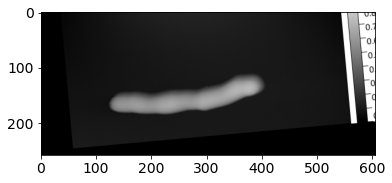

In [10]:
plt.imshow(aligned_list[3])

In [20]:
# save aligned stack as a video
out = cv2.VideoWriter(date + '.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

for i in range(len(aligned_list)):
    out.write(aligned_list[i])
out.release()